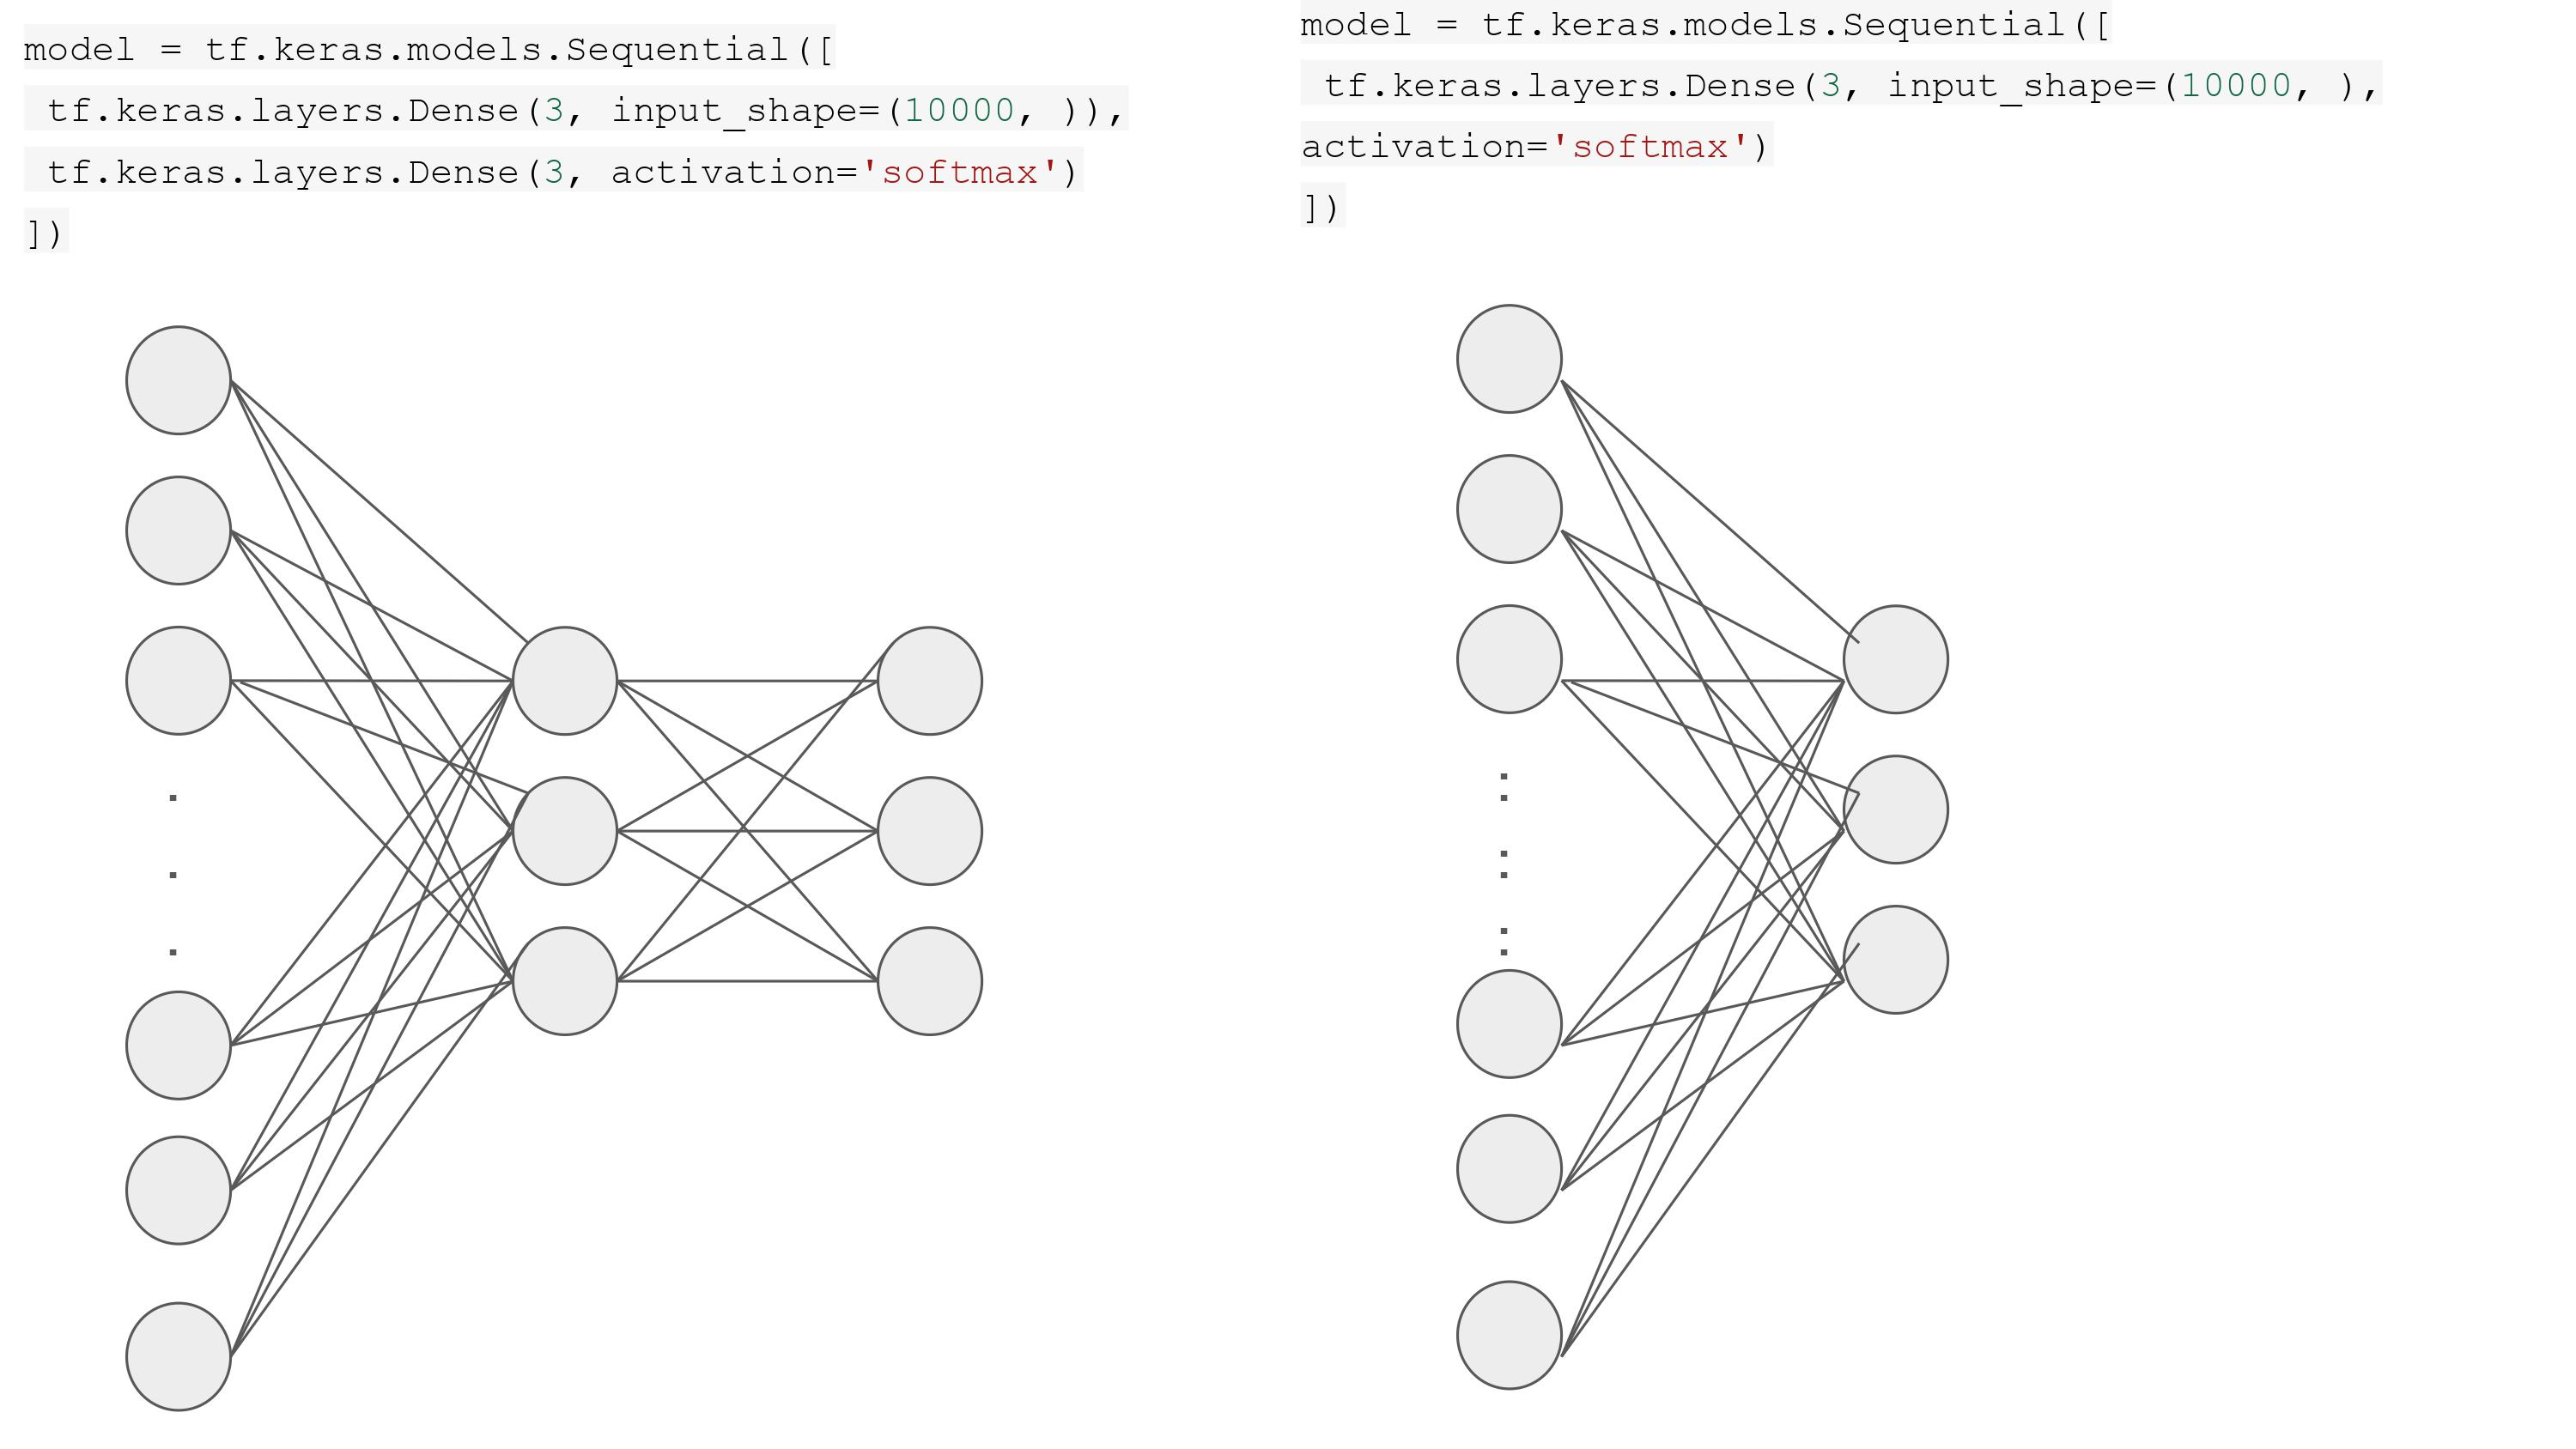

## Preprocessing the dataset for regression
1. Standardization : Change data into the distribution with mean 0 and std1

$$x_{new} = \frac{x-mean(X)}{SD(x)}$$

2. Min-Max normalization : change date with max 1 and min 0

$$x_{new} = \frac{x-min(X)}{max(X)-min(X)}$$


2025.1.15
1. Try with three node

2. Try Eq.(11)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import tensorflow as tf
import os
# import  imageio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from keras.utils import to_categorical #For keras > 2.0
# import cv2
import scipy.io
from sklearn.model_selection import train_test_split
from keras import initializers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
# from pyESN.pyESN import ESN

In [ ]:
# mat = scipy.io.loadmat('drive/MyDrive/Quantum_reservoir_processing/case2.mat')
# mat['n1_selected']

In [3]:
# mat = scipy.io.loadmat('EQ13_data.mat')
mat = scipy.io.loadmat('drive/MyDrive/Quantum_reservoir_processing/case2_2nodes.mat')
mat2 = scipy.io.loadmat('drive/MyDrive/Quantum_reservoir_processing/case2_g2_density_data.mat')
mat3 = scipy.io.loadmat('drive/MyDrive/Quantum_reservoir_processing/case2_different_odd_m.mat')
n1 = mat['n1_selected']
n2 = mat['n2_selected']
n3 = mat['n3_selected']
g2 = mat['g2']
n = mat2['n_m']
r = mat['r']

g2_all = mat3['g2_all']
n_all = mat3['nm_all']

# Normalization with each sample or whole sample

# 3 nodes and pick more points

In [ ]:
len(n1[0][0][0])
# n1[0][0]

20

In [4]:
g2_re = []
ns = []
number = 1000
r = np.arange(0, 1, 0.001)
for i in range(number):
# for i in range(np.shape(n1)[1]):
    input = np.concatenate((np.reshape(n1[0][i],len(n1[0][0][0])), np.reshape(n2[0][i],len(n2[0][0][0])),  np.reshape(n3[0][i],len(n3[0][0][0]))) )
    # input = input/sum(input)
    ns.append(input)
    g2_re.append({g2[0][i]:r[i]})
    # g2_re.append(g2[0][i])


In [5]:
X = np.array(ns)
# Y = np.reshape(g2_re,(number,1))
Y = g2_re
# X, Y = shuffle(X,Y)
test_rate = 0.02
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=test_rate)
X_train, X_val, Y_train, Y_val = train_test_split(X_train,Y_train, test_size=test_rate)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [6]:
n = np.reshape(n,[1000,])
X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(n, g2_re, test_size=test_rate)
X_train_c = np.reshape(X_train_c,[len(X_train_c),1])
X_test_c = np.reshape(X_test_c,[len(X_test_c),1])

In [7]:
Y_train_g2 = []
Y_train_r = []

Y_test_g2 = []
Y_test_r = []

for ele in Y_train:
  key = list(ele.keys())
  value = list(ele.values())
  Y_train_g2.append(key)
  Y_train_r.append(value[0])
Y_train_g2 = np.reshape(Y_train_g2,(len(Y_train_g2),1))


for ele in Y_test:
  key = list(ele.keys())
  value = list(ele.values())
  Y_test_g2.append(key[0])
  Y_test_r.append(value[0])
Y_test_g2 = np.reshape(Y_test_g2,(len(Y_test_g2),1))

Y_train_g2_c = []
Y_train_r_c = []

Y_test_g2_c = []
Y_test_r_c = []

for ele in Y_train_c:
  key = list(ele.keys())
  value = list(ele.values())
  Y_train_g2_c.append(key)
  Y_train_r_c.append(value[0])
Y_train_g2_c = np.reshape(Y_train_g2_c,(len(Y_train_g2_c),1))

for ele in Y_test_c:
  key = list(ele.keys())
  value = list(ele.values())
  Y_test_g2_c.append(key[0])
  Y_test_r_c.append(value[0])
Y_test_g2_c = np.reshape(Y_test_g2_c,(len(Y_test_g2_c),1))

In [8]:
regressor = RandomForestRegressor()
regressor.fit(X_train, Y_train_g2)
sc_train = regressor.score(X_train, Y_train_g2)
sc_test = regressor.score(X_test, Y_test_g2)
print([sc_train, sc_test])
Y_predict_RFR = regressor.predict(X_test)


regressor_classic = RandomForestRegressor(n_estimators=100)
regressor_classic.fit(X_train_c, Y_train_g2_c)
Y_predict_RFR_classic = regressor_classic.predict(X_test_c)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[0.9999994537181792, 0.9999976015748617]


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


7.258297506524863e-07


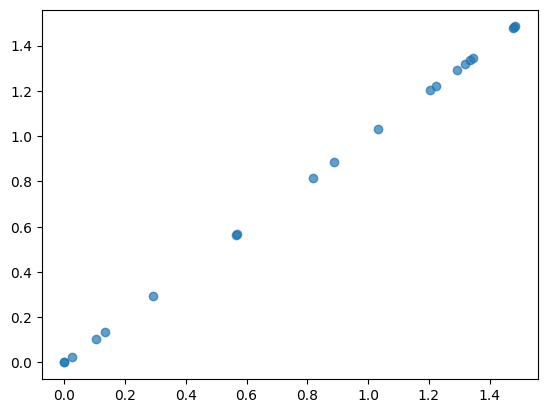

In [9]:
error = mean_squared_error(Y_test_g2,Y_predict_RFR)
print(error)
plt.scatter(Y_test_g2, Y_predict_RFR, alpha=0.7, label="Predicted vs True")

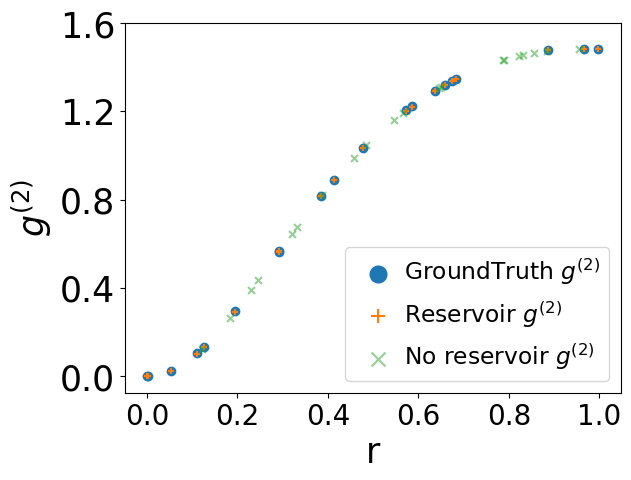

In [10]:
# plt.scatter(Y_test_r, Y_test_g2)
plt.scatter(Y_test_r, Y_test_g2,label = 'GroundTruth $g^{(2)}$')
plt.scatter(Y_test_r, Y_predict_RFR,marker="+",s=25,label = 'Reservoir $g^{(2)}$')
plt.scatter(Y_test_r_c, Y_predict_RFR_classic,marker="x",s=25,label = 'No reservoir $g^{(2)}$', alpha=0.5)
plt.xlabel('r',fontsize=25)
plt.ylabel('$g^{(2)}$',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks([0.0,0.4,0.8,1.2,1.6],fontsize=25)
plt.legend(fontsize=16.8,markerscale=2,handletextpad=0.1, loc=4)
# plt.text(0.4, 0.31, 'Train score = 0.999',fontsize=20)
# plt.text(0.4, 0.16, 'Test score = 0.999',fontsize=20)
# plt.text(0.4, 0.01, 'MSE = $2.27\\times10^{-6}$',fontsize=20)

In [ ]:
Y_test_g2[0:3]

array([[1.11916667],
       [1.30799178],
       [1.32417232]])

In [ ]:
# axs[1].scatter(Y_test_r, Y_test_g2,label = 'GroundTruth')
# axs[1].scatter(Y_test_r, Y_predict_RFR,marker="+",s=25,label = 'Reservoir')
# axs[1].scatter(Y_test_r_c, Y_predict_RFR_classic,marker="x",s=25,label = 'No reservoir', alpha=0.4)
print([mean_squared_error(Y_test_g2, Y_predict_RFR),mean_squared_error(Y_test_g2_c, Y_predict_RFR_classic)])

[7.982837879740714e-07, 1.2286679126773757e-06]


In [ ]:
len(r)

1000

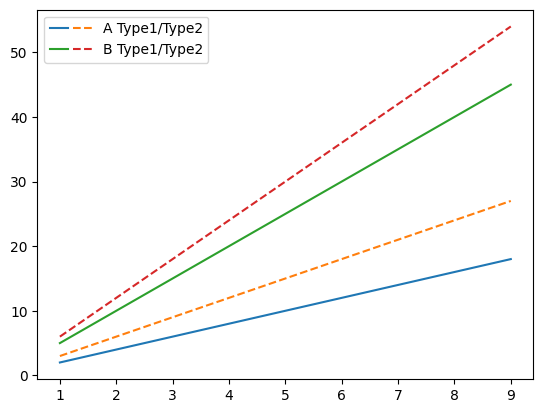

In [11]:
from matplotlib.legend_handler import HandlerTuple
x = np.arange(1,10)
a_1 = 2 * x
a_2 = 3 * x
b_1 = 5 * x
b_2 = 6 * x

p1, = plt.plot(x, a_1,)
p2, = plt.plot(x, a_2, linestyle='--')
p3, = plt.plot(x, b_1)
p4, = plt.plot(x, b_2, linestyle='--')

plt.legend([(p1, p2), (p3, p4)], ['A Type1/Type2', 'B Type1/Type2'], numpoints=1,handler_map={tuple: HandlerTuple(ndivide=None)}, handlelength=3)

plt.show()

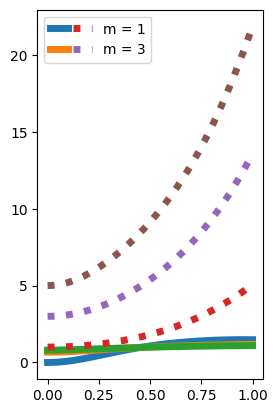

In [12]:
plt.subplot(1,2,1)
p1,=plt.plot(r, g2[0],linewidth=5)
p2,=plt.plot(r, g2_all[1],linewidth=5)
p3,=plt.plot(r, g2_all[2],linewidth=5)
p4,=plt.plot(r, abs(n),linewidth=5,linestyle=":")
p5,=plt.plot(r, n_all[1],linewidth=5,linestyle=":")
p6,=plt.plot(r, n_all[2],linewidth=5,linestyle=":")
plt.legend([(p1, p4), (p2, p5)], ['m = 1', 'm = 3'], numpoints=1,handler_map={tuple: HandlerTuple(ndivide=None)}, handlelength=3)

In [ ]:
type(p4)

matplotlib.lines.Line2D

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


(0.6, 1.3)

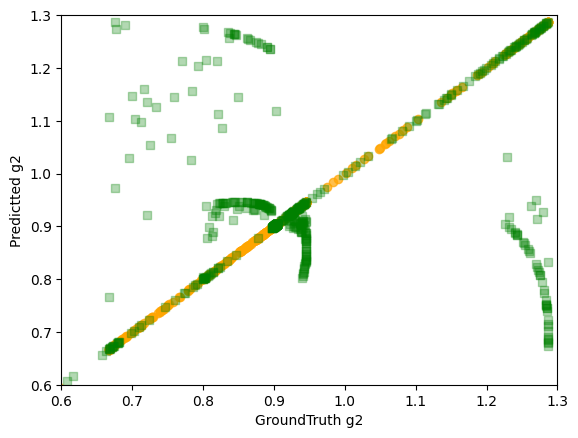

In [13]:
mat = scipy.io.loadmat('drive/MyDrive/Quantum_reservoir_processing/case2_m_135.mat')


g2_all = mat['g2_all']
n_all_second = mat['n_all']     ### reservoir densities
nm_all = mat['nm_all']

g2_1 = g2_all[0]
g2_3 = g2_all[1]
g2_5 = g2_all[2]
g2_new_all = np.concatenate((g2_1,g2_3,g2_5),axis=0)
g2_new_all = np.reshape(g2_new_all,(len(g2_new_all),1))


n1 = n_all_second[0]
n3 = n_all_second[1]
n5 = n_all_second[2]

nc1 = nm_all[0]
nc3 = nm_all[1]
nc5 = nm_all[2]
nc_new_all = np.concatenate((nc1,nc3,nc5),axis=0)
nc_new_all = np.reshape(nc_new_all,(len(g2_new_all),1))


n1_new = []
n3_new = []
n5_new = []
number = 1000
r = np.arange(0, 1, 0.001)
for i in range(number):
    n1_new.append(n1[i][0])
    n3_new.append(n3[i][0])
    n5_new.append(n5[i][0])
# n_new_all = np.concatenate(n1_new, n3_new, n5_new)
n_new_all = np.concatenate((n1_new, n3_new, n5_new), axis=0) #Reservoir density
np.shape(n_new_all)

X_reservoir = n_new_all
X_no_reservoir = nc_new_all
Y = g2_new_all

X_train_reservoir, X_test_reservoir, Y_train_reservoir, Y_test_reservoir = train_test_split(X_reservoir,Y, test_size=0.2)
X_train_no_reservoir, X_test_no_reservoir, Y_train_no_reservoir, Y_test_no_reservoir = train_test_split(X_no_reservoir,Y, test_size=0.2)

# regressor = RandomForestRegressor()
regressor_reservoir = ExtraTreesRegressor(n_estimators=200)
regressor_no_reservoir = ExtraTreesRegressor(n_estimators=200)

# regressor.fit(n3_new, g2_3)
regressor_reservoir.fit(X_train_reservoir, Y_train_reservoir)
Y_predict_RFR_reservoir = regressor_reservoir.predict(X_test_reservoir)

regressor_no_reservoir.fit(X_train_no_reservoir, Y_train_no_reservoir)
Y_predict_RFR_no_reservoir = regressor_no_reservoir.predict(X_test_no_reservoir)

# Y_predict_RFR_3 = regressor.predict(n3_new)
# Y_predict_RFR_5 = regressor.predict(n5_new)

plt.scatter(Y_test_reservoir, Y_predict_RFR_reservoir, marker='o', color='orange', alpha=0.7, label="Predicted vs True")
plt.scatter(Y_test_no_reservoir, Y_predict_RFR_no_reservoir, marker='s', alpha=0.3, color='green', label="Predicted vs True")
# plt.title('without Reservoir')
# plt.text(0,1.2,'$MSE = 0.032$',fontsize=20)
# print(mean_squared_error(Y_test, Y_predict_RFR))
plt.xlabel('GroundTruth g2')
plt.ylabel('Predictted g2')
plt.xlim([0.6,1.3])
plt.ylim([0.6,1.3])
# regressor_classic = RandomForestRegressor(n_estimators=100)
# regressor_classic.fit(X_train_c, Y_train_g2_c)
# Y_predict_RFR_classic = regressor_classic.predict(X_test_c)

In [16]:
Nomin = sum(np.square(np.reshape(Y_test_reservoir,[len(Y_predict_RFR_reservoir),]) - Y_predict_RFR_reservoir))
denom = sum(np.square(np.reshape(Y_test_reservoir,[len(Y_predict_RFR_reservoir),]) + Y_predict_RFR_reservoir))

Nomin_no = sum(np.square(np.reshape(Y_test_no_reservoir,[len(Y_predict_RFR_no_reservoir),]) - Y_predict_RFR_no_reservoir))
denom_no = sum(np.square(np.reshape(Y_test_no_reservoir,[len(Y_predict_RFR_no_reservoir),]) + Y_predict_RFR_no_reservoir))

print([Nomin/denom, Nomin_no/denom_no])


[np.float64(2.547847342925864e-09), np.float64(0.009160954078454185)]


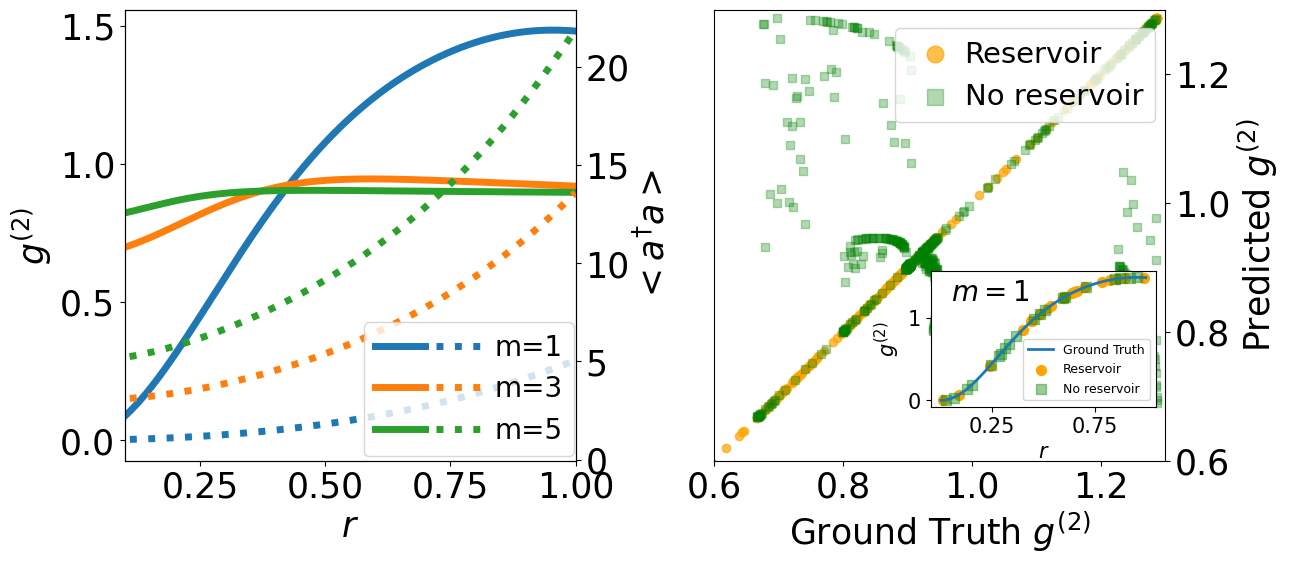

In [ ]:
from matplotlib.legend_handler import HandlerTuple
fig, axs = plt.subplots(1,2, figsize=(13, 13))

font_size = 25
axs[0].tick_params(axis ='y',labelsize=25)
axs[0].tick_params(axis ='x',labelsize=font_size)
p1,=axs[0].plot(r, g2[0],linewidth=5)
p2,=axs[0].plot(r, g2_all[1],linewidth=5)
p3,=axs[0].plot(r, g2_all[2],linewidth=5)
# axs[0].set_yticks([0.2,0.6,1.0,1.4])
# axs[0].set_xticks([0.1,0.2,0.4,0.6,0.8,1.0])
axs[0].set_xlim([0.1,1])
# plt.xlim([0.1,1])
axs[0].set_xlabel('$r$',fontsize=font_size)
axs[0].set_ylabel('$g^{(2)}$',fontsize=font_size)
t = axs[0].twinx()
t.tick_params(axis ='y',labelsize=font_size)
p4,=t.plot(r, abs(n),linewidth=5,linestyle=":")
# t.set_yticks([0.116,0.120,0.124,0.128])
t.set_ylabel('$<a^{\dagger}a>$',fontsize=font_size)
axs[0].set_box_aspect(1)
p5,=t.plot(r, n_all[1],linewidth=5,linestyle=":")
p6,=t.plot(r, n_all[2],linewidth=5,linestyle=":")
plt.legend([(p1, p4), (p2, p5), (p3,p6)], ['m=1', 'm=3', 'm=5'],fontsize=20,markerscale=2,handletextpad=0.3, loc=[0.53,0.01], numpoints=1,handler_map={tuple: HandlerTuple(ndivide=None)}, handlelength=4)
# plt.legend([(p1, p4), (p2, p5)], ['m = 1', 'm = 3'])
# ax1.set_yticks([0.2,0.6,1.0,1.4])
# ax2.set_yticks([0.116,0.120,0.124,0.128])
# plt.xticks([-2,-1,0,1,2])


axs[1].set_ylabel('Predicted $g^{(2)}$',fontsize=font_size)
axs[1].set_xlabel('Ground Truth $g^{(2)}$',fontsize=font_size)
# axs[1].scatter(Y_test_r, Y_test_g2,label = 'Ground Truth')
# axs[1].scatter(Y_test_r, Y_predict_RFR,marker="+",s=25,label = 'Reservoir')
# axs[1].scatter(Y_test_r_c, Y_predict_RFR_classic,marker="x",s=25,label = 'No reservoir', alpha=0.4)
axs[1].scatter(Y_test_reservoir, Y_predict_RFR_reservoir, marker='o', color='orange', alpha=0.7, label="Reservoir")
axs[1].scatter(Y_test_no_reservoir, Y_predict_RFR_no_reservoir, marker='s', alpha=0.3, color='green', label="No reservoir")
axs[1].tick_params(labelsize=font_size)
# axs[1].set_xticks([0.1,0.2,0.4,0.6,0.8,1.0])
axs[1].set_xlim([0.6,1.3])
axs[1].set_ylim([0.6,1.3])
# axs[1].set_yticks([0.2,0.6,1.0,1.4])
axs[1].set_box_aspect(1)
axs[1].yaxis.set_label_position("right")
axs[1].yaxis.tick_right()
axs[1].legend(fontsize=21,markerscale=2,handletextpad=0.001, loc=[0.4,0.75])
axins = axs[1].inset_axes([0.48,0.02,0.5,0.5],alpha=0.3)
axins.plot(r, g2[0],label = 'Ground Truth',linewidth=2)
axins.scatter(Y_test_r, Y_predict_RFR,marker="o",color='orange',s=50,label = 'Reservoir')
axins.scatter(Y_test_r_c, Y_predict_RFR_classic,marker="s",color='green',s=50,label = 'No reservoir', alpha=0.4)
# axins.set_aspect(0.4)
axins.set_box_aspect(0.6)
axins.set_xticks([0.25,0.75])
axins.set_yticks([0,1.0])
font_size_inset = 15
axins.set_xlabel('$r$',fontsize=font_size_inset)
axins.set_ylabel('$g^{(2)}$',fontsize=font_size_inset)
axins.tick_params(labelsize=font_size_inset)
axins.legend(fontsize=9)
axins.text(0.05, 1.2, '$m = 1$', fontsize=20)
# axins.rcParams['figure.figsize'] = [2, 2]
# axs[1].tick_params(axis ='y', labelcolor = 'g')
# axs[1].twinx().tick_params(axis ='y', labelcolor = 'b')

# axins = axs[1].inset_axes([0.5,0.5,0.5,0.5])
# axins.scatter(Y_test_r, Y_test_g2)
# axins.scatter(Y_test_r, Y_predict_RFR,marker="+",s=25,label = 'Reservoir')
# axins.scatter(Y_test_r_c, Y_predict_RFR_classic,marker="x",s=25,label = 'No reservoir', alpha=0.4)



# axs[1,0].tick_params(axis ='y', labelcolor = 'g')
# axs[1,0].twinx().tick_params(axis ='y', labelcolor = 'b')

# axs[1,1].tick_params(axis ='y', labelcolor = 'g')
# axs[1,1].twinx().tick_params(axis ='y', labelcolor = 'b')


# fig.supylabel('Green label', color='g')
plt.tight_layout()